## Parte 1 - Tratando os Dados de Chuva do INMET

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d as uf

#### Trabalhos FUTUROS:
- Identificar o Numero de Estacoes por Estado
- NUmero de estacoes Perdidas por Estado e relativo

### Agrupando e Identificando dados de chuva e localização
Aqui, abriremos os dados baixados no site do inmet referentes aos anos de 2013 a 2022, inclusos. Cada arquivo contém, além dos dados de chuva, a localização da estação em latitude e longitude. 
As saídas do código abaixo serão
- Ind_Pluv.dataframe, que condensará o índice pluviométrico por estação (coluna) para os dez anos (linha)
- Loc.geodataframe, que conterá a localização das estações para que possamos, no futuro, correlacionar dado de chuva com posição e interpolar dados faltantes

In [2]:
Arq2 = os.listdir('./Data_2008_2023/')
Ind_Pluv = pd.DataFrame()


code = [] ; lat = [] ; long = []; cidade = []; uf = []; altitude = []
n_dados = []
for folder in Arq2:
    try:
        Arq = os.listdir('./Data_2008_2023/'+folder)
        print(Arq)
        Aux = pd.DataFrame()
        
        code2 = []
        for file in Arq:
            _ = pd.read_csv('./Data_2008_2023/'+folder+'/'+file,sep=';',encoding="ISO-8859-1",nrows=6)
            cidade.append(_.iloc[1,1])
            uf.append(_.iloc[0,1])
            code.append(_.iloc[2,1])
            lat.append(_.iloc[3,1])
            long.append(_.iloc[4,1])
            altitude.append(_.iloc[5,1])

            code2.append(_.iloc[2,1])
        
        for i,file in enumerate(Arq):
            _ = pd.read_csv('./Data_2008_2023/'+folder+'/'+file,sep=';',encoding="ISO-8859-1",skiprows=8,decimal=',')
            n_dados.append( len(_) )
            if len(_) > 8700:
                
                aux = _['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']
                if len(_) == 8784:
                    aux = aux.drop(  list(range(744, 768))  )
                    
                Aux[code2[i]] = aux

        Ind_Pluv = pd.concat([Ind_Pluv,Aux])
    
    except:
        None

Loc = pd.DataFrame()
Loc['Cidade'] = cidade
Loc['UF'] = uf
Loc['Código'] = code
Loc['Latitude'] = lat
Loc['Longitude'] = long
Loc['Altitude'] = altitude

['INMET_NE_PE_A309_ARCO VERDE_01-01-2013_A_31-12-2013.CSV', 'INMET_S_PR_A872_VENTANIA_01-01-2013_A_31-12-2013.CSV', 'INMET_N_PA_A214_RONDON DO PARA_01-01-2013_A_31-12-2013.CSV', 'INMET_NE_MA_A204_BALSAS_01-01-2013_A_31-12-2013.CSV', 'INMET_N_AM_A112_HUMAITA_01-01-2013_A_31-12-2013.CSV', 'INMET_CO_GO_A035_ITUMBIARA_01-01-2013_A_31-12-2013.CSV', 'INMET_N_PA_A215_SALINOPOLIS_01-01-2013_A_31-12-2013.CSV', 'INMET_SE_MG_A529_PASSA QUATRO_01-01-2013_A_31-12-2013.CSV', 'INMET_SE_MG_A535_FLORESTAL_01-01-2013_A_31-12-2013.CSV', 'INMET_S_RS_A803_SANTA MARIA_01-01-2013_A_31-12-2013.CSV', 'INMET_N_AM_A126_PRESIDENTE FIGUEIREDO_01-01-2013_A_31-12-2013.CSV', 'INMET_S_RS_A836_JAGUARAO_01-01-2013_A_31-12-2013.CSV', 'INMET_SE_SP_A715_SAO MIGUEL ARCANJO_01-01-2013_A_31-12-2013.CSV', 'INMET_NE_CE_A305_FORTALEZA_01-01-2013_A_31-12-2013.CSV', 'INMET_SE_MG_A507_UBERLANDIA_01-01-2013_A_31-12-2013.CSV', 'INMET_S_SC_A866_Laguna  - Farol de Santa Marta_01-01-2013_A_31-12-2013.CSV', 'INMET_S_SC_A816_NOVO HORIZONT

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_SE_SP_A747_PRADOPOLIS_01-01-2014_A_31-12-2014.CSV', 'INMET_SE_MG_A525_SACRAMENTO_01-01-2014_A_31-12-2014.CSV', 'INMET_NE_PI_A336_ALVORADA DO GURGUEIA_01-01-2014_A_31-12-2014.CSV', 'INMET_CO_MS_A758_JARDIM_01-01-2014_A_31-12-2014.CSV', 'INMET_S_PR_A823_INACIO MARTINS_01-01-2014_A_31-12-2014.CSV', 'INMET_S_RS_A828_ERECHIM_01-01-2014_A_31-12-2014.CSV', 'INMET_NE_PB_A321_PATOS_01-01-2014_A_31-12-2014.CSV', 'INMET_S_PR_A822_NOVA TEBAS_01-01-2014_A_31-12-2014.CSV', 'INMET_CO_MS_A710_PARANAIBA_01-01-2014_A_31-12-2014.CSV', 'INMET_S_SC_A868_ITAJAI_01-01-2014_A_31-12-2014.CSV', 'INMET_NE_PI_A335_PIRIPIRI_01-01-2014_A_31-12-2014.CSV', 'INMET_NE_BA_A427_PORTO SEGURO_01-01-2014_A_31-12-2014.CSV', 'INMET_S_RS_A830_SAO BORJA_01-01-2014_A_31-12-2014.CSV', 'INMET_SE_ES_A622_PRES. KENNEDY_01-01-2014_A_31-12-2014.CSV', 'INMET_S_RS_A854_FREDERICO WESTPHALEN_01-01-2014_A_31-12-2014.CSV', 'INMET_NE_SE_A417_ITABAIANINHA_01-01-2014_A_31-12-2014.CSV', 'INMET_SE_RJ_A621_VILA MILITAR_01-01-2014_A_31-12-

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_NE_AL_A371_PIRANHAS_01-01-2022_A_31-12-2022.CSV', 'INMET_NE_MA_A206_CHAPADINHA_01-01-2022_A_31-12-2022.CSV', 'INMET_NE_MA_A255_ZE DOCA_01-01-2022_A_31-12-2022.CSV', 'INMET_NE_PE_A351_FLORESTA_01-01-2022_A_31-12-2022.CSV', 'INMET_SE_MG_A551_RIO PARDO DE MINAS_01-01-2022_A_31-12-2022.CSV', 'INMET_NE_PI_A361_CASTELO DO PIAUI_01-01-2022_A_31-12-2022.CSV', 'INMET_CO_MS_A742_CASSILANDIA_01-01-2022_A_31-12-2022.CSV', 'INMET_CO_MS_A720_COXIM_01-01-2022_A_31-12-2022.CSV', 'INMET_CO_GO_A003_MORRINHOS_01-01-2022_A_31-12-2022.CSV', 'INMET_SE_SP_A740_SAO LUIZ DO PARAITINGA_01-01-2022_A_31-12-2022.CSV', 'INMET_CO_MT_A934_ALTO TAQUARI_01-01-2022_A_31-12-2022.CSV', 'INMET_CO_DF_A046_GAMA (PONTE ALTA)_01-01-2022_A_31-12-2022.CSV', 'INMET_S_PR_B803_CAMPINA DA LAGOA_01-01-2022_A_31-12-2022.CSV', 'INMET_N_PA_A254_REDENCAO_01-01-2022_A_31-12-2022.CSV', 'INMET_N_AM_A117_COARI_01-01-2022_A_31-12-2022.CSV', 'INMET_S_RS_A893_ENCRUZILHADA DO SUL_01-01-2022_A_31-12-2022.CSV', 'INMET_S_RS_A833_SANTIAGO_01

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_N_AM_A122_MAUES_01-01-2015_A_31-12-2015.CSV', 'INMET_CO_MT_A901_CUIABA_01-01-2015_A_31-12-2015.CSV', 'INMET_S_RS_A882_TEUTONIA_01-01-2015_A_31-12-2015.CSV', 'INMET_S_RS_A832_SAO GABRIEL_01-01-2015_A_31-12-2015.CSV', 'INMET_SE_MG_A547_SAO ROMAO_01-01-2015_A_31-12-2015.CSV', 'INMET_S_PR_A873_MORRETES_01-01-2015_A_31-12-2015.CSV', 'INMET_NE_MA_A237_CAXIAS_01-01-2015_A_31-12-2015.CSV', 'INMET_S_PR_A849_DIAMANTE DO NORTE_01-01-2015_A_31-12-2015.CSV', 'INMET_N_PA_A239_MONTE ALEGRE_01-01-2015_A_31-12-2015.CSV', 'INMET_N_PA_A213_TOME ACU_01-01-2015_A_31-12-2015.CSV', 'INMET_N_RO_A925_PORTO VELHO_01-01-2015_A_31-12-2015.CSV', 'INMET_S_RS_A811_CANGUCU_01-01-2015_A_31-12-2015.CSV', 'INMET_SE_SP_A706_CAMPOS DO JORDAO_01-01-2015_A_31-12-2015.CSV', 'INMET_NE_BA_A415_SANTA RITA DE CASSIA_01-01-2015_A_31-12-2015.CSV', 'INMET_S_SC_A815_SAO JOAQUIM_01-01-2015_A_31-12-2015.CSV', 'INMET_CO_MT_A914_JUARA_01-01-2015_A_31-12-2015.CSV', 'INMET_SE_SP_A712_IGUAPE_01-01-2015_A_31-12-2015.CSV', 'INMET_S_P

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_N_PA_A235_NOVO REPARTIMENTO_01-01-2012_A_31-12-2012.CSV', 'INMET_CO_MT_A917_SINOP_01-01-2012_A_31-12-2012.CSV', 'INMET_NE_PE_A341_CARUARU_01-01-2012_A_31-12-2012.CSV', 'INMET_S_PR_A869_CIDADE GAUCHA_01-01-2012_A_31-12-2012.CSV', 'INMET_N_TO_A040_MATEIROS_25-10-2012_A_31-12-2012.CSV', 'INMET_NE_CE_A324_TAUA_01-01-2012_A_31-12-2012.CSV', 'INMET_N_PA_A226_BRAGANCA_01-01-2012_A_31-12-2012.CSV', 'INMET_N_PA_A239_MONTE ALEGRE_06-07-2012_A_31-12-2012.CSV', 'INMET_N_TO_A044_ARAGUATINS_01-01-2012_A_31-12-2012.CSV', 'INMET_NE_MA_A207_GRAJAU_01-01-2012_A_31-12-2012.CSV', 'INMET_S_RS_A802_RIO GRANDE_01-01-2012_A_31-12-2012.CSV', 'INMET_CO_GO_A026_MINEIROS_01-01-2012_A_31-12-2012.CSV', 'INMET_S_RS_A840_BENTO GONCALVES_01-01-2012_A_31-12-2012.CSV', 'INMET_N_TO_A038_DIANOPOLIS_01-01-2012_A_31-12-2012.CSV', 'INMET_CO_GO_A016_JATAI_01-01-2012_A_31-12-2012.CSV', 'INMET_SE_MG_A556_MANHUACU_01-01-2012_A_31-12-2012.CSV', 'INMET_SE_RJ_A611_VALENCA_01-01-2012_A_31-12-2012.CSV', 'INMET_SE_MG_A508_ALME

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_S_PR_A846_FOZ DO IGUACU_15-02-2008_A_31-12-2008.CSV', 'INMET_NE_RN_A344_CALCANHAR_08-05-2008_A_31-12-2008.CSV', 'INMET_NE_BA_A430_PIATA_03-05-2008_A_31-12-2008.CSV', 'INMET_N_PA_A212_PARAGOMINAS_01-01-2008_A_31-12-2008.CSV', 'INMET_NE_MA_A219_TURIACU_10-06-2008_A_31-12-2008.CSV', 'INMET_SE_RJ_A607_CAMPOS_01-01-2008_A_31-12-2008.CSV', 'INMET_SE_MG_A551_RIO PARDO DE MINAS_01-01-2008_A_31-12-2008.CSV', 'INMET_CO_MS_A720_COXIM_01-01-2008_A_31-12-2008.CSV', 'INMET_CO_GO_A003_MORRINHOS_01-01-2008_A_31-12-2008.CSV', 'INMET_CO_MS_A704_TRES LAGOAS_01-01-2008_A_31-12-2008.CSV', 'INMET_S_PR_A820_MAL. CANDIDO RONDON_01-01-2008_A_31-12-2008.CSV', 'INMET_SE_MG_A522_SERRA DOS AIMORES_01-01-2008_A_31-12-2008.CSV', 'INMET_CO_GO_A032_MONTE ALEGRE DE GOIAS_01-01-2008_A_31-12-2008.CSV', 'INMET_CO_MT_A932_GUIRATINGA_24-01-2008_A_31-12-2008.CSV', 'INMET_NE_BA_A442_EUCLIDES DA CUNHA_31-03-2008_A_31-12-2008.CSV', 'INMET_NE_CE_A342_CRATEUS_11-12-2008_A_31-12-2008.CSV', 'INMET_SE_SP_A718_RANCHARIA_01-01

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_CO_MT_A937_PONTES E LACERDA_01-01-2009_A_31-12-2009.CSV', 'INMET_NE_PI_A362_SAO PEDRO DO PIAUI_20-05-2009_A_31-12-2009.CSV', 'INMET_S_PR_A843_DOIS VIZINHOS_01-01-2009_A_31-12-2009.CSV', 'INMET_NE_PI_A312_TERESINA_01-01-2009_A_31-12-2009.CSV', 'INMET_S_SC_A861_RIO DO CAMPO_01-01-2009_A_31-12-2009.CSV', 'INMET_NE_BA_A402_BARREIRAS_01-01-2009_A_31-12-2009.CSV', 'INMET_S_SC_A845_BOM JARDIM DA SERRA - MORRO DA IGREJA_01-01-2009_A_31-12-2009.CSV', 'INMET_N_PA_A233_SANTANA DO ARAGUAIA_01-01-2009_A_31-12-2009.CSV', 'INMET_S_SC_A862_RIO NEGRINHO_01-01-2009_A_31-12-2009.CSV', 'INMET_SE_RJ_A601_ECOLOGIA AGRICOLA_01-01-2009_A_31-12-2009.CSV', 'INMET_SE_RJ_A618_TERESOPOLIS_01-01-2009_A_31-12-2009.CSV', 'INMET_S_SC_A841_JOACABA_01-01-2009_A_31-12-2009.CSV', 'INMET_CO_MT_A912_CAMPO VERDE_01-01-2009_A_31-12-2009.CSV', 'INMET_NE_BA_A439_IBOTIRAMA_01-01-2009_A_31-12-2009.CSV', 'INMET_SE_ES_A613_SANTA TERESA_01-01-2009_A_31-12-2009.CSV', 'INMET_CO_MT_A927_BRASNORTE (MUNDO NOVO)_01-01-2009_A_31-12

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_SE_MG_A535_FLORESTAL_01-01-2017_A_31-12-2017.CSV', 'INMET_S_RS_A803_SANTA MARIA_01-01-2017_A_31-12-2017.CSV', 'INMET_N_AM_A126_PRESIDENTE FIGUEIREDO_01-01-2017_A_31-12-2017.CSV', 'INMET_S_RS_A836_JAGUARAO_01-01-2017_A_31-12-2017.CSV', 'INMET_SE_MG_F501_BELO HORIZONTE - CERCADINHO_01-01-2017_A_31-12-2017.CSV', 'INMET_SE_SP_A715_SAO MIGUEL ARCANJO_01-01-2017_A_31-12-2017.CSV', 'INMET_NE_CE_A305_FORTALEZA_01-01-2017_A_31-12-2017.CSV', 'INMET_SE_MG_A507_UBERLANDIA_01-01-2017_A_31-12-2017.CSV', 'INMET_S_SC_A866_Laguna  - Farol de Santa Marta_01-01-2017_A_31-12-2017.CSV', 'INMET_NE_PE_A309_ARCO VERDE_01-01-2017_A_31-12-2017.CSV', 'INMET_CO_MT_A923_PRIMAVERA DO LESTE_26-10-2017_A_31-12-2017.CSV', 'INMET_CO_DF_A042_BRAZLANDIA_19-07-2017_A_31-12-2017.CSV', 'INMET_S_PR_A872_VENTANIA_01-01-2017_A_31-12-2017.CSV', 'INMET_N_PA_A214_RONDON DO PARA_01-01-2017_A_31-12-2017.CSV', 'INMET_S_PR_B806_COLOMBO_01-01-2017_A_31-12-2017.CSV', 'INMET_NE_MA_A204_BALSAS_01-01-2017_A_31-12-2017.CSV', 'INMET

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_CO_MS_A710_PARANAIBA_01-01-2010_A_31-12-2010.CSV', 'INMET_NE_PI_A335_PIRIPIRI_01-01-2010_A_31-12-2010.CSV', 'INMET_NE_BA_A427_PORTO SEGURO_01-01-2010_A_31-12-2010.CSV', 'INMET_S_RS_A830_SAO BORJA_01-01-2010_A_31-12-2010.CSV', 'INMET_SE_ES_A622_PRES. KENNEDY_01-01-2010_A_31-12-2010.CSV', 'INMET_S_RS_A854_FREDERICO WESTPHALEN_01-01-2010_A_31-12-2010.CSV', 'INMET_NE_SE_A417_ITABAIANINHA_01-01-2010_A_31-12-2010.CSV', 'INMET_SE_SP_A747_PRADOPOLIS_01-01-2010_A_31-12-2010.CSV', 'INMET_NE_PI_A336_ALVORADA DO GURGUEIA_01-01-2010_A_31-12-2010.CSV', 'INMET_SE_MG_A525_SACRAMENTO_01-01-2010_A_31-12-2010.CSV', 'INMET_S_PR_A823_INACIO MARTINS_01-01-2010_A_31-12-2010.CSV', 'INMET_S_RS_A828_ERECHIM_01-01-2010_A_31-12-2010.CSV', 'INMET_S_PR_A822_NOVA TEBAS_01-01-2010_A_31-12-2010.CSV', 'INMET_NE_PB_A321_PATOS_01-01-2010_A_31-12-2010.CSV', 'INMET_NE_RN_A317_MACAU_01-01-2010_A_31-12-2010.CSV', 'INMET_SE_RJ_A621_VILA MILITAR_01-01-2010_A_31-12-2010.CSV', 'INMET_S_RS_A838_CAMAQUA_01-01-2010_A_31-12-

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_CO_MT_A935_PORTO ESTRELA_01-01-2019_A_31-12-2019.CSV', 'INMET_CO_MS_S717_SELVIRIA_01-01-2019_A_31-12-2019.CSV', 'INMET_NE_PI_A337_CARACOL_01-01-2019_A_31-12-2019.CSV', 'INMET_S_RS_A852_SAO LUIZ GONZAGA_01-01-2019_A_31-12-2019.CSV', 'INMET_NE_BA_A458_RIBEIRA DO AMPARO_01-01-2019_A_31-12-2019.CSV', 'INMET_NE_MA_A224_ESTREITO_01-01-2019_A_31-12-2019.CSV', 'INMET_SE_MG_A505_ARAXA_01-01-2019_A_31-12-2019.CSV', 'INMET_SE_MG_A531_MARIA DA FE_01-01-2019_A_31-12-2019.CSV', 'INMET_NE_PI_A354_OEIRAS_01-01-2019_A_31-12-2019.CSV', 'INMET_CO_MT_A914_JUARA_01-01-2019_A_31-12-2019.CSV', 'INMET_SE_SP_A712_IGUAPE_01-01-2019_A_31-12-2019.CSV', 'INMET_NE_CE_A315_BARBALHA_01-01-2019_A_31-12-2019.CSV', 'INMET_SE_ES_A623_NOVA VENECIA_01-01-2019_A_31-12-2019.CSV', 'INMET_NE_PI_A308_PARNAIBA_01-01-2019_A_31-12-2019.CSV', 'INMET_S_PR_A807_CURITIBA_01-01-2019_A_31-12-2019.CSV', 'INMET_NE_CE_A325_QUIXERAMOBIM_01-01-2019_A_31-12-2019.CSV', 'INMET_CO_MS_S712_NOVA ALVORADA DO SUL_01-01-2019_A_31-12-2019.CSV'

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_SE_MG_A546_GUARDA-MOR_01-01-2021_A_31-12-2021.CSV', 'INMET_CO_MS_A724_CORUMBA_01-01-2021_A_31-12-2021.CSV', 'INMET_SE_ES_A634_VILA VELHA_01-01-2021_A_31-12-2021.CSV', 'INMET_SE_SP_A768_TUPA_01-01-2021_A_31-12-2021.CSV', 'INMET_CO_MS_A743_RIO BRILHANTE_01-01-2021_A_31-12-2021.CSV', 'INMET_NE_PI_A343_PICOS_01-01-2021_A_31-12-2021.CSV', 'INMET_SE_SP_A763_MARILIA_01-01-2021_A_31-12-2021.CSV', 'INMET_SE_MG_A516_PASSOS_01-01-2021_A_31-12-2021.CSV', 'INMET_CO_MT_A923_PRIMAVERA DO LESTE_01-01-2021_A_31-12-2021.CSV', 'INMET_N_AC_A102_PARQUE ESTADUAL CHANDLESS_01-01-2021_A_31-12-2021.CSV', 'INMET_SE_MG_A569_SETE LAGOAS_01-01-2021_A_31-12-2021.CSV', 'INMET_NE_CE_A347_CAMPOS SALES_01-01-2021_A_31-12-2021.CSV', 'INMET_CO_MS_S711_LAGUNA CARAPA_01-01-2021_A_31-12-2021.CSV', 'INMET_NE_RN_A304_NATAL_01-01-2021_A_31-12-2021.CSV', 'INMET_N_AC_A136_PORTO WALTER_01-01-2021_A_31-12-2021.CSV', 'INMET_CO_MS_S710_ITAPORA_01-01-2021_A_31-12-2021.CSV', 'INMET_S_SC_A857_SAO MIGUEL DO OESTE_01-01-2021_A_31

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_CO_MS_S703_BANDEIRANTES_01-01-2020_A_31-12-2020.CSV', 'INMET_SE_RJ_A620_CAMPOS DOS GOYTACAZES - SAO TOME_01-01-2020_A_31-12-2020.CSV', 'INMET_CO_MT_A921_SAO FELIX  DO ARAGUAIA_01-01-2020_A_31-12-2020.CSV', 'INMET_N_PA_A240_MARABA_01-01-2020_A_31-12-2020.CSV', 'INMET_CO_GO_A025_RIO VERDE_01-01-2020_A_31-12-2020.CSV', 'INMET_S_RS_A801_PORTO ALEGRE_01-01-2020_A_31-12-2020.CSV', 'INMET_S_RS_A880_VACARIA_01-01-2020_A_31-12-2020.CSV', 'INMET_N_PA_A252_DOM ELISEU_01-01-2020_A_31-12-2020.CSV', 'INMET_NE_CE_A369_QUIXADA_01-01-2020_A_31-12-2020.CSV', 'INMET_S_RS_A812_CACAPAVA DO SUL_01-01-2020_A_31-12-2020.CSV', 'INMET_SE_RJ_A667_SAQUAREMA - SAMPAIO CORREIA_01-01-2020_A_31-12-2020.CSV', 'INMET_NE_PB_A352_CAMARATUBA_01-01-2020_A_31-12-2020.CSV', 'INMET_CO_MS_A761_SONORA_01-01-2020_A_31-12-2020.CSV', 'INMET_SE_SP_A765_BERTIOGA_01-01-2020_A_31-12-2020.CSV', 'INMET_NE_BA_A440_JACOBINA_01-01-2020_A_31-12-2020.CSV', 'INMET_NE_BA_A408_ITABERABA_01-01-2020_A_31-12-2020.CSV', 'INMET_N_TO_A051_PIU

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_N_AM_A133_MANICORE_01-01-2018_A_31-12-2018.CSV', 'INMET_NE_RN_A317_MACAU_01-01-2018_A_31-12-2018.CSV', 'INMET_N_TO_A052_SANTA ROSA DO TOCANTINS_01-01-2018_A_31-12-2018.CSV', 'INMET_S_RS_A838_CAMAQUA_01-01-2018_A_31-12-2018.CSV', 'INMET_SE_RJ_A621_VILA MILITAR_01-01-2018_A_31-12-2018.CSV', 'INMET_SE_MG_A511_TIMOTEO_01-01-2018_A_31-12-2018.CSV', 'INMET_SE_MG_A571_PARACATU_16-03-2018_A_31-12-2018.CSV', 'INMET_CO_MT_A902_TANGARA DA SERRA_01-01-2018_A_31-12-2018.CSV', 'INMET_N_PA_A231_ITAITUBA_01-01-2018_A_31-12-2018.CSV', 'INMET_NE_BA_A423_REMANSO_01-01-2018_A_31-12-2018.CSV', 'INMET_SE_MG_A549_AGUAS VERMELHAS_01-01-2018_A_31-12-2018.CSV', 'INMET_SE_MG_A514_SAO JOAO DEL REI_01-01-2018_A_31-12-2018.CSV', 'INMET_SE_RJ_A620_SAO TOME_01-01-2018_A_31-12-2018.CSV', 'INMET_CO_MS_A756_AGUA CLARA_01-01-2018_A_31-12-2018.CSV', 'INMET_CO_MS_A710_PARANAIBA_01-01-2018_A_31-12-2018.CSV', 'INMET_NE_PI_A335_PIRIPIRI_01-01-2018_A_31-12-2018.CSV', 'INMET_S_SC_A868_ITAJAI_01-01-2018_A_31-12-2018.CSV'

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_S_RS_A811_CANGUCU_01-01-2011_A_31-12-2011.CSV', 'INMET_N_RO_A925_PORTO VELHO_01-01-2011_A_31-12-2011.CSV', 'INMET_SE_SP_A706_CAMPOS DO JORDAO_01-01-2011_A_31-12-2011.CSV', 'INMET_NE_BA_A415_SANTA RITA DE CASSIA_01-01-2011_A_31-12-2011.CSV', 'INMET_S_SC_A815_SAO JOAQUIM_01-01-2011_A_31-12-2011.CSV', 'INMET_N_AM_A122_MAUES_01-01-2011_A_31-12-2011.CSV', 'INMET_CO_MT_A901_CUIABA_01-01-2011_A_31-12-2011.CSV', 'INMET_S_PR_A873_MORRETES_01-01-2011_A_31-12-2011.CSV', 'INMET_S_RS_A832_SAO GABRIEL_01-01-2011_A_31-12-2011.CSV', 'INMET_SE_MG_A547_SAO ROMAO_01-01-2011_A_31-12-2011.CSV', 'INMET_NE_MA_A237_CAXIAS_01-01-2011_A_31-12-2011.CSV', 'INMET_S_PR_A849_DIAMANTE DO NORTE_01-01-2011_A_31-12-2011.CSV', 'INMET_N_PA_A213_TOME ACU_01-01-2011_A_31-12-2011.CSV', 'INMET_CO_MT_A935_PORTO ESTRELA_01-01-2011_A_31-12-2011.CSV', 'INMET_NE_PI_A337_CARACOL_01-01-2011_A_31-12-2011.CSV', 'INMET_S_RS_A852_SAO LUIZ GONZAGA_01-01-2011_A_31-12-2011.CSV', 'INMET_NE_MA_A224_ESTREITO_01-01-2011_A_31-12-2011.CS

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

['INMET_N_AM_S103_CRMN MANAUS_01-12-2016_A_31-12-2016.CSV', 'INMET_N_PA_A226_BRAGANCA_01-01-2016_A_31-12-2016.CSV', 'INMET_NE_MA_A207_GRAJAU_01-01-2016_A_31-12-2016.CSV', 'INMET_N_TO_A044_ARAGUATINS_01-01-2016_A_31-12-2016.CSV', 'INMET_S_RS_A802_RIO GRANDE_01-01-2016_A_31-12-2016.CSV', 'INMET_CO_GO_A026_MINEIROS_01-01-2016_A_31-12-2016.CSV', 'INMET_S_RS_A840_BENTO GONCALVES_01-01-2016_A_31-12-2016.CSV', 'INMET_N_TO_A038_DIANOPOLIS_01-01-2016_A_31-12-2016.CSV', 'INMET_N_PA_A235_NOVO REPARTIMENTO_01-01-2016_A_31-12-2016.CSV', 'INMET_NE_PE_A341_CARUARU_01-01-2016_A_31-12-2016.CSV', 'INMET_CO_MT_A917_SINOP_01-01-2016_A_31-12-2016.CSV', 'INMET_S_PR_A869_CIDADE GAUCHA_01-01-2016_A_31-12-2016.CSV', 'INMET_NE_CE_A324_TAUA_01-01-2016_A_31-12-2016.CSV', 'INMET_NE_BA_A442_EUCLIDES DA CUNHA_01-01-2016_A_31-12-2016.CSV', 'INMET_S_PR_A855_PLANALTO_01-01-2016_A_31-12-2016.CSV', 'INMET_SE_MG_A521_PAMPULHA_01-01-2016_A_31-12-2016.CSV', 'INMET_NE_AL_A327_PALMEIRA DOS INDIOS_01-01-2016_A_31-12-2016.CSV',

/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Aux[code2[i]] = aux
/var/folders/nd/sdq3r0ys5rx5y9pxp7c12jz40000gn/T/ipykernel_3347/325548933.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [3]:
#Trocando ',' por '.'
Loc = Loc.stack().str.replace(',','.').unstack() 

#Removendo dados Duplicados, por termos lido dados de
Loc = Loc.drop_duplicates(subset=['Código']) 
Ind_Pluv = (Ind_Pluv.T.drop_duplicates()).T

#Tornando Loc um geodf
Loc = gpd.GeoDataFrame( Loc, geometry=gpd.points_from_xy(Loc.Longitude, Loc.Latitude), crs="EPSG:4326" )

#Removendo Estações do Arquipélago de São Pedro e Paulo e da Antártida de Ind_Pluv e Loc
##print(Loc.loc[ (Loc.Cidade == 'CRIOSFERA') | (Loc.Cidade =='ARQ.SAO PEDRO E SAO PAULO')  ]) #mostrando tais estações

rem_lst = Loc.loc[ (Loc.Cidade == 'CRIOSFERA') | (Loc.Cidade =='ARQ.SAO PEDRO E SAO PAULO')  ]['Código'].values
for codigo in rem_lst:
    try:
        del Ind_Pluv[codigo]
    except:
        None
Loc = Loc.loc[ (Loc.Cidade != 'CRIOSFERA') & (Loc.Cidade != 'ARQ.SAO PEDRO E SAO PAULO')  ]

Loc.head(10), Loc.shape

(           Cidade  UF Código      Latitude     Longitude Altitude  \
 0      ARCO VERDE  PE   A309   -8.41694443  -37.08333333    680.7   
 1        VENTANIA  PR   A872  -24.23833333  -50.24555555     1106   
 2  RONDON DO PARA  PA   A214   -4.82749999  -48.17333332      203   
 3          BALSAS  MA   A204   -7.45527777  -46.02749999      254   
 4         HUMAITA  AM   A112   -7.92277777  -63.12138888       72   
 5       ITUMBIARA  GO   A035  -18.40972222  -49.19194444      488   
 6     SALINOPOLIS  PA   A215     -.6186111  -47.35666666       41   
 7    PASSA QUATRO  MG   A529   -22.3961111  -44.96166666     1040   
 8       FLORESTAL  MG   A535  -19.88527778  -44.41694444      750   
 9     SANTA MARIA  RS   A803  -29.70833333  -53.70361111       95   
 
                       geometry  
 0   POINT (-37.08333 -8.41694)  
 1  POINT (-50.24556 -24.23833)  
 2   POINT (-48.17333 -4.82750)  
 3   POINT (-46.02750 -7.45528)  
 4   POINT (-63.12139 -7.92278)  
 5  POINT (-49.19194 -18

#### Abrindo Mapa de Estados do Brasil e Plotando Localização Das Estações

In [4]:
UF = gpd.read_file('./2022/BR_UF_2022/BR_UF_2022.shp')
LocG = Loc.copy()

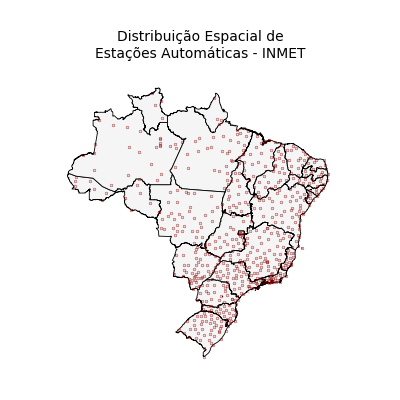

In [5]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(2, 2), dpi=200)

UF.plot(facecolor="whitesmoke", edgecolor="black", ax=ax,lw=0.3)
LocG.plot(ax=ax, color='darkred',marker='o',markersize=0.02)

ax.set_title("Distribuição Espacial de\nEstações Automáticas - INMET", fontsize=5)
ax.axis("off")
ax.set_xlim( -74, -34)
plt.tight_layout()

### Limpando a Tabela de Chuvas - Ind_Pluv
A tabela de chuvas contém muitos valores negativos e NaNs que seram substituidos através de uma interpolação ponderada pelo inverso da dsitância. Para isso, vamos identificar as dez estaçõs vizinhas de cada estação e registrá-los em Loc.geodf

In [6]:
Ind_Pluv.head(3)
Ind_Pluv.shape

(131400, 614)

In [7]:
#Removendo valores negativos. Assumo-os como NaN para futura interpolação dos NaNs  
Ind_Pluv[Ind_Pluv < 0 ] = np.NAN



# Passo 1: Remover colunas de tabela1 que têm mais de 60.000 dados faltantes e armazenar os nomes das colunas removidas
nans_por_coluna = Ind_Pluv.isna().sum()
colunas_removidas = nans_por_coluna[nans_por_coluna > 60000].index.tolist()

# Remover as colunas de Ind_Pluv
Ind_Pluv = Ind_Pluv.drop(columns=colunas_removidas)

# Passo 2: Remover as linhas em Loc correspondentes às colunas removidas
Loc = Loc[~Loc['Código'].isin(colunas_removidas)]
Loc.shape

(447, 7)

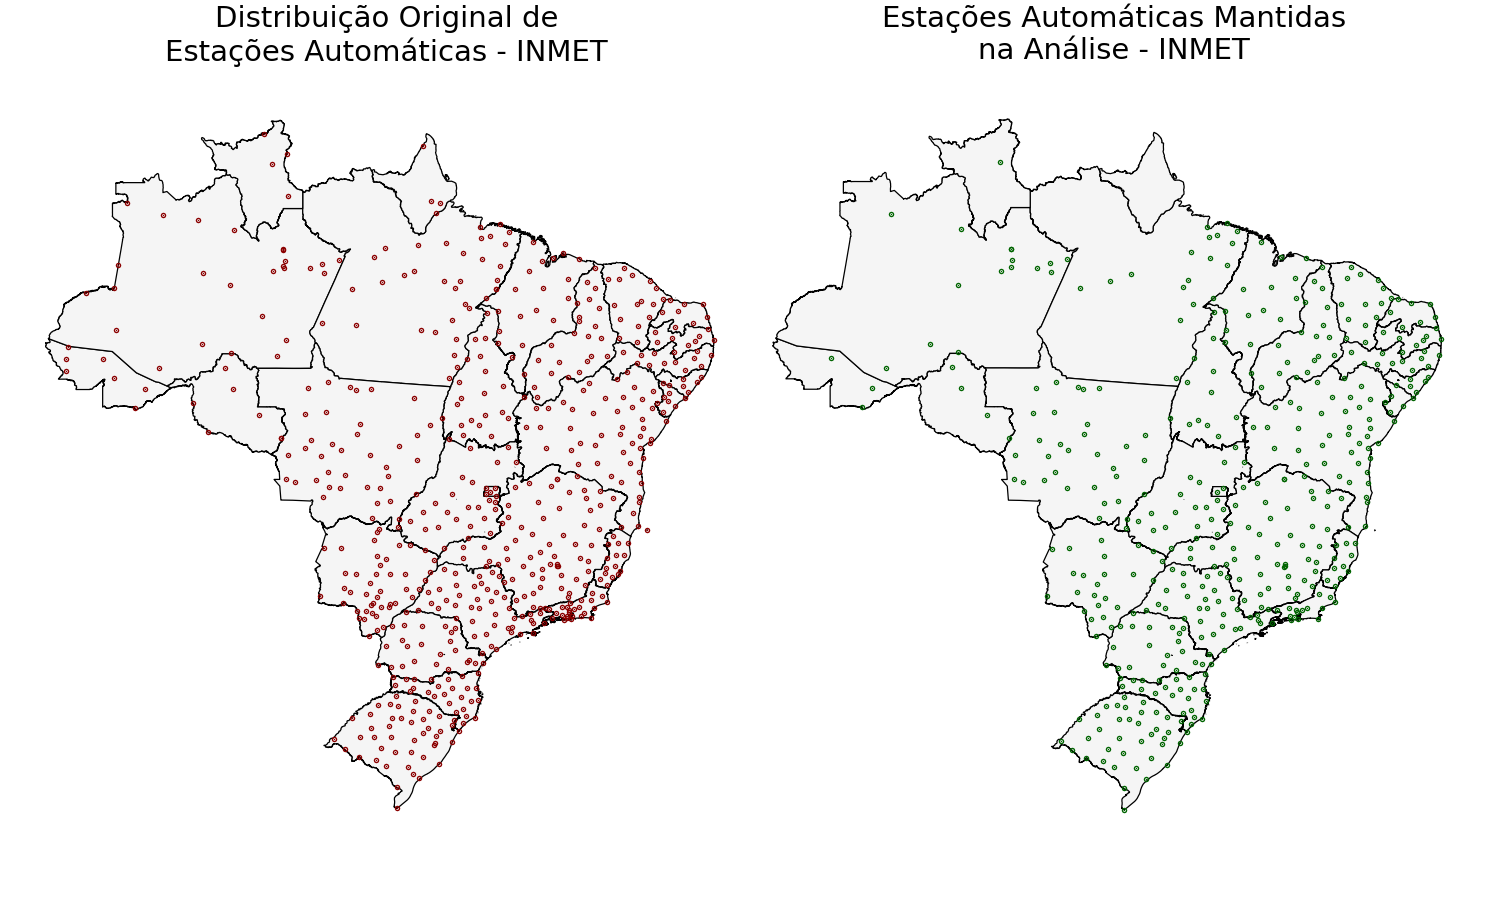

In [8]:
%matplotlib widget

fig, axs = plt.subplots(ncols=2, figsize=(5, 3), dpi=300)

# Plotagem do mapa do Brasil com estados
UF.plot(facecolor="whitesmoke", edgecolor="black", ax=axs[0], lw=0.3)
axs[0].set_title("Distribuição Original de\nEstações Automáticas - INMET", fontsize=7)
axs[0].axis("off")
axs[0].set_xlim(-74, -34)

# Plotagem das estações
LocG.plot(ax=axs[0], marker='o', color='darkred', facecolors='darkred', markersize=0.1)
#Loc.plot(ax=axs[0], marker='o', color='darkgreen', facecolors='darkgreen', markersize=0.1)

# Plotagem do segundo mapa (caso haja)
# Aqui é um exemplo de como seria o segundo mapa
UF.plot(facecolor="whitesmoke", edgecolor="black", ax=axs[1], lw=0.3)
axs[1].set_title("Estações Automáticas Mantidas\nna Análise - INMET", fontsize=7)
axs[1].axis("off")
axs[1].set_xlim(-74, -34)

#Plotagem das estações no segundo mapa (se necessário)
#LocG.plot(ax=axs[1], marker='o', color='darkred', facecolors='darkred', markersize=0.1)
Loc.plot(ax=axs[1], marker='o', color='darkgreen', facecolors='darkgreen', markersize=0.1)

plt.tight_layout()
plt.savefig('Estacoes.png', bbox_inches='tight',dpi=300)

In [ ]:
Ind_Pluv.shape, Loc.shape

In [ ]:
#Identificando os K vizinhos mais proximos
for i in np.arange( len(Loc) ):
    idx   = Loc.index[i]
    point = Loc.loc[ idx, 'geometry'  ]

    d = Loc.distance(point).values
    seq = np.argsort(d)
    
    for k in np.arange(30):
        Loc.loc[idx, f'Dis_{k+1}'] = d[seq[k+1]]
        Loc.loc[idx, f'Viz_{k+1}'] = Loc['Código'][Loc.index[k+1]]

Loc.sample(frac=1).head(3)

In [ ]:
 Ind_Pluv

#### Substintuindo NaNs de Ind_Pluv via interpolação dos 10 vizinhos mais proximos, ponderado pelo inverso da distancia ao quadrado

In [ ]:
n = 2
for m,j in enumerate( Ind_Pluv.columns ):
    #print(Loc.loc[ Loc['Código'] == j  ][f'Viz_{1}'])

    v = []
    d = []
    for k in np.arange(30):
        v.append( Loc.loc[ Loc['Código'] == j  ][f'Viz_{k+1}'].values[0] )
        d.append( Loc.loc[ Loc['Código'] == j  ][f'Dis_{k+1}'].values[0] )

    d = np.array(d)
    a = ( (Ind_Pluv[v]/(d**n)) /( (1/d**n).sum() ) ).sum(axis=1)

    Ind_Pluv[j] = Ind_Pluv[j].fillna( a )
#Esse procedimento deverá eliminar qualquer NaN contido no dataframe Ind_Pluv. 

## Filtro de media movel

In [ ]:
# Definindo a função para aplicar o filtro de média móvel#
# def apply_uniform_filter(col):
#     return uf(col, size=7, mode='wrap')

# # Aplicando o filtro em cada coluna do DataFrame
# Ind_Pluv_filtered = Ind_Pluv.apply(apply_uniform_filter, axis=0)

## Salvando Ind_Pluv, Loc

In [ ]:
Ind_Pluv.to_csv('Indice_Pluviometrico_x_Tempo.csv', sep=',',index=False)
Loc.to_csv('Infos_x_Localizacao.csv', sep=',')

In [ ]:
Loc